In [1]:
%load_ext autoreload
%load_ext Cython
%autoreload 2
import mc.pocket as pocket
%aimport mc.pocket
import numpy as np
import random
import matplotlib.pyplot as plt

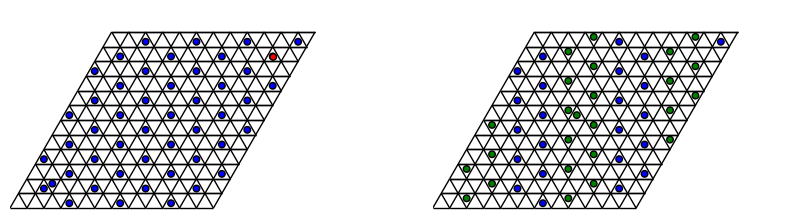

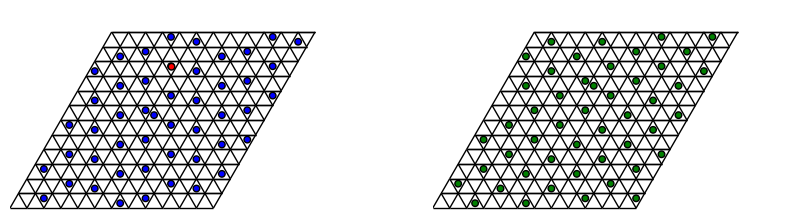

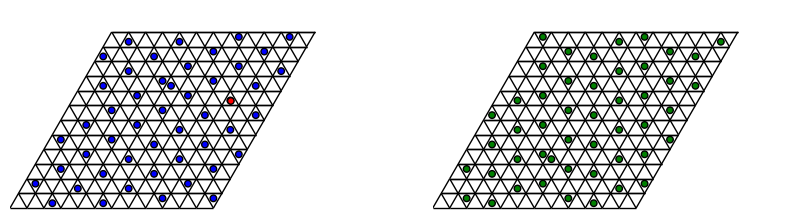

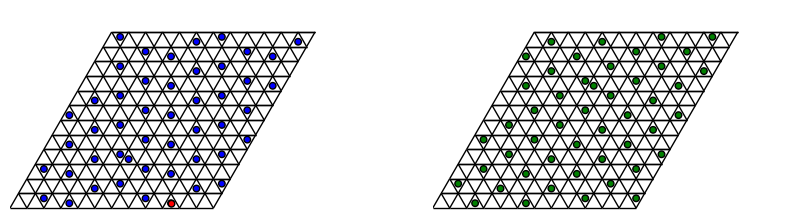

In [10]:

pocket.width, pocket.height = 12, 12

pos = []
for i in range(0, pocket.height, 3):
    for j in range(0, pocket.width, 3):
        pos.append((i, j, 0))
        pos.append((i+1, j+1, 0))
        pos.append((i+2, j+2, 0))
pos.remove((0, 0, 0))
pos.append((1, 1, 1))

sample = (pos, pocket.gen_occ(pos))

fig, ax = plt.subplots(1, 2, figsize=[10, 4])
sample, _ = pocket.pocket_move(sample, axes=ax)
fig, ax = plt.subplots(1, 2, figsize=[10, 4])
sample, _ = pocket.pocket_move(sample, axes=ax)

seed = random.choice(sample[0])
sym = pocket.rand_symmetry()

fig, ax = plt.subplots(1, 2, figsize=[10, 4])
sample, _ = pocket.pocket_move(sample, axes=ax, seed=seed, sym=sym)
fig, ax = plt.subplots(1, 2, figsize=[10, 4])
sample, _ = pocket.pocket_move(sample, axes=ax, seed=pocket.apply_symmetry(sym, seed), sym=sym)



Text(0, 0.5, 'Energy')

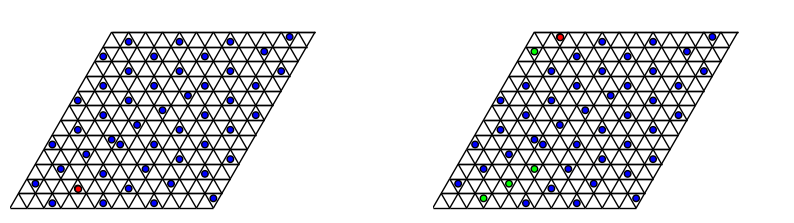

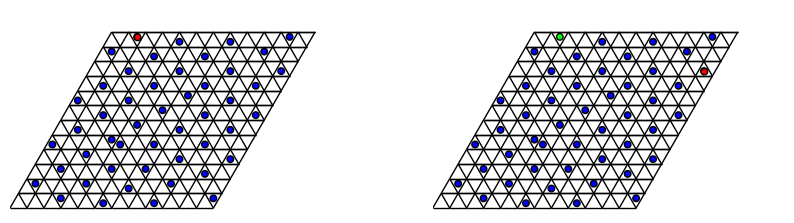

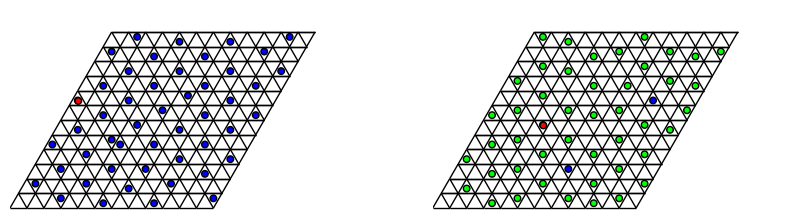

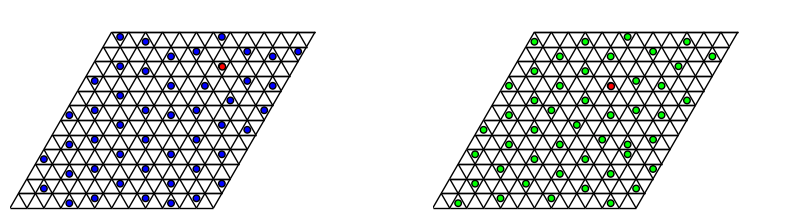

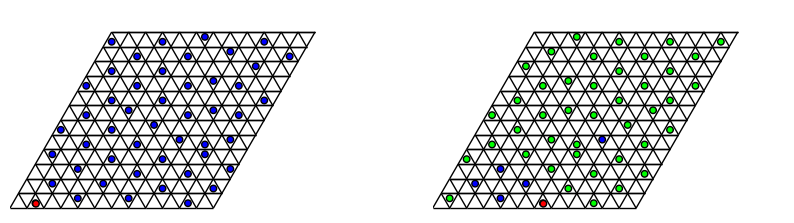

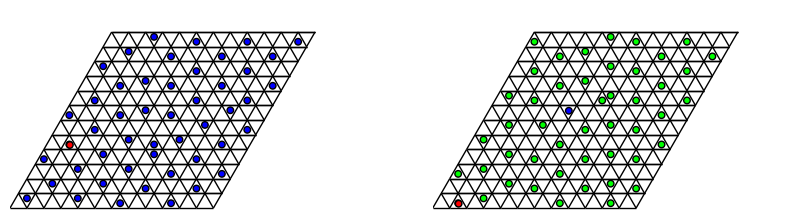

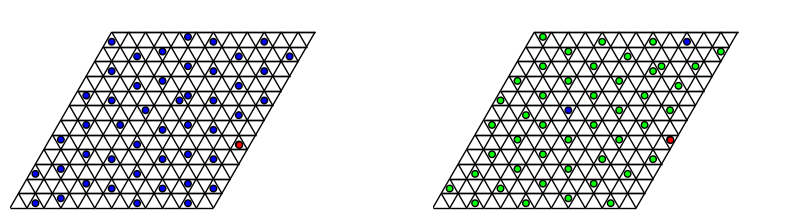

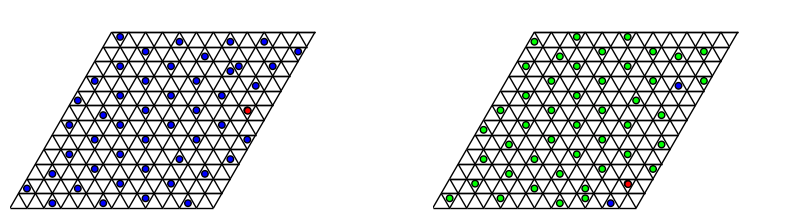

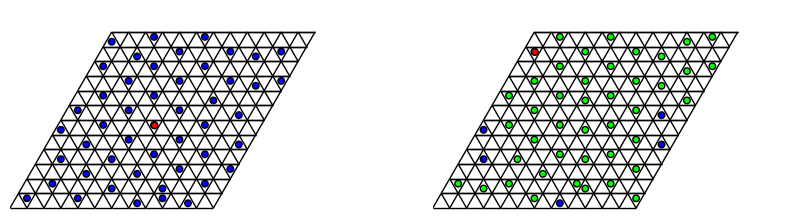

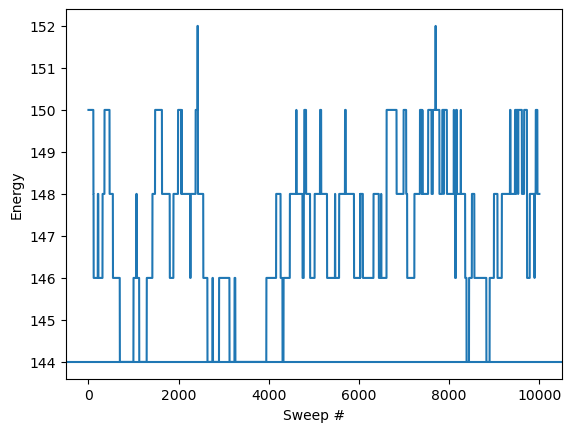

In [25]:
pocket.width, pocket.height = 12, 12

pos = []
for i in range(0, pocket.height, 3):
    for j in range(0, pocket.width, 3):
        pos.append((i, j, 0))
        pos.append((i+1, j+1, 0))
        pos.append((i+2, j+2, 0))
pos.remove((0, 0, 0))
pos.append((1, 1, 1))

sample = (pos, pocket.gen_occ(pos))

random.seed(0)

energies = []
energies.append(pocket.cluster_energy(sample))
for i in range(10000):
    if 60 > i > 50:
        fig, ax = plt.subplots(1, 2, figsize=[10, 4])
        sample, _ = pocket.pocket_move(sample, cascade_probability=0.999, axes=ax)
    else:
        sample, _ = pocket.pocket_move(sample, cascade_probability=0.999)
    energies.append(pocket.cluster_energy(sample))

plt.figure()
plt.plot(energies)
plt.axhline(4 * 4 * 3 * 3)
plt.xlabel("Sweep #")
plt.ylabel("Energy")
